In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

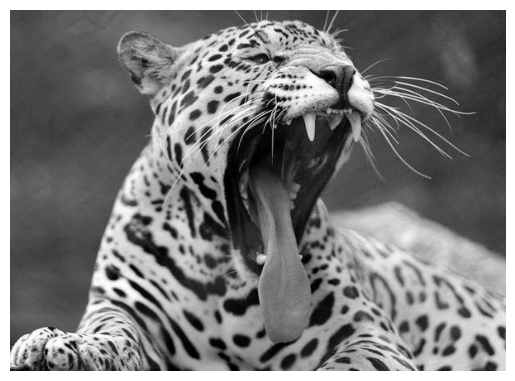

Entropy: 7.678214384804447
[0.63335579 0.63335579 0.67543924 0.67370548 0.62260988 0.55451423
 0.48172405 0.44135229 0.41922192 0.46059585 0.50059666 0.54596648
 0.58617737 0.59879584 0.5965255  0.59278127 0.56371407 0.55296816
 0.51385279 0.53958829 0.55902074 0.57480886 0.56468555 0.53326197
 0.45994345 0.42704509 0.40184617 0.42782154 0.43368999 0.44579396
 0.45849846 0.45960962 0.48186285 0.48478559 0.51654135 0.56536092
 0.59706208 0.63455298 0.67424205 0.67687601 0.65235244 0.60834456
 0.61623169 0.64727223 0.63545317 0.65626963 0.64793285 0.56536092
 0.47202833 0.39245485 0.34280269 0.35353288 0.39066016 0.43141965
 0.47877102 0.52853063 0.5419105  0.54319373 0.52742036 0.52896643
 0.54872448 0.55278046 0.50735056 0.50494142 0.5218407  0.48622235
 0.5        0.53386984 0.58368221 0.60307665 0.59825927 0.57699227
 0.59934716 0.61480967 0.63531438 0.61501975 0.5887253  0.56589749
 0.53958829 0.51480189 0.45878725 0.40771461 0.33020082 0.38658641
 0.41940993 0.47247886 0.49237571 0

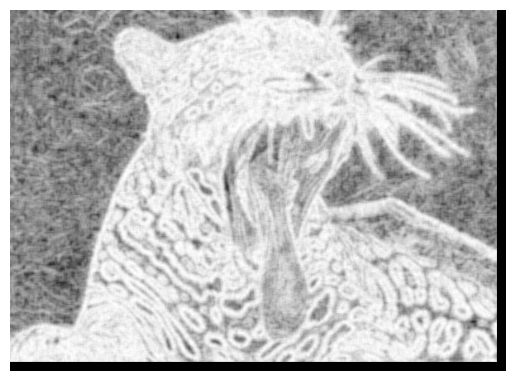

In [ ]:
image_path = "/content/drive/MyDrive/Projet Image/Dataset/tiger.png"
image = Image.open(image_path).convert('L')
image_array = np.array(image)

plt.imshow(image_array, cmap='gray')
plt.axis('off')
plt.show()

hist = np.histogram(image_array, bins=256, range=(0,256))[0]
hist = hist / np.sum(hist)
entropy = -np.sum(hist * np.log2(hist + 1e-10))
print("Entropy:", entropy)

#def energy_entropy(img):
def calcul_entropy(region):
    hist = np.histogram(region, bins=256, range=(0,256))[0]
    hist = hist / np.sum(hist)
    entropy = -np.sum(hist * np.log2(hist + 1e-10))
    return entropy

height, width = image_array.shape
img_entropy = np.zeros((height,width))
for i in range(height - 11):
    for j in range(width - 11):
        region = image_array[i:i+6, j:j+6]
        entr_pix = calcul_entropy(region)
        img_entropy[i,j] = entr_pix

img_entropy = img_entropy/np.max(img_entropy)
print(img_entropy[200])
plt.imshow(img_entropy, cmap='gray')
plt.axis('off')
plt.show()


In [ ]:
def enlever_ligne(img):
  energy = 0
  return energy,img_reduite

def enlever_colonne(img):
  energy = 0
  return energy,img_reduite

def T(r,c,img):

  mat_image_reduite = np.empty((r, c), dtype=object)

  mat = np.zeros((r,c))
  for i in range(1,c):
    E_sx,img_reduite = enlever_colonne(mat_image_reduite(0,i-1)) # On récupere la valeur de l'energie pour enlever la meilleure colonne et l'image sans cette colonne
    mat(0,i) = mat(0,i-1) + E_sx
  for j in range(1,r):
    E_sy,img_reduite = enlever_ligne(mat_image_reduite(j_1,0)) # On récupere la valeur de l'energie pour enlever la meilleure ligne et l'image sans cette ligne
    mat(j,0) = mat(j-1,0) + E_sy

  #A ce stade on a rempli toute la premiere ligne et toute la premiere colonne de la matrice

  pos_x = 1
  pos_y = 1
  while pos_x < r and pos_y < c:
    for i in range(pos_y,c): # On remplit une ligne
      mat(pos_x,i) = min(mat(pos_x-1,i) + enlever_ligne(mat_image_reduite(pos_x-1,i))[0], mat(pos_x,i-1) + enlever_colonne(mat_image_reduite(pos_x,i-1))[0])
    for j in range(pos_x,r): # On remplit une colonne
      mat(j,pos_y) = min(mat(j-1,pos_y) + enlever_colonne(mat_image_reduite(j-1,pos_y))[0], mat(j,pos_y-1) + enlever_ligne(mat_image_reduite(j,pos_y-1))[0])
    pos_x += 1
    pos_y += 1

    # La matrice est maintenant remplie, il suffit de faire un backtracking partant d'en bas droite vers haut gauche en gardant en memoire le chemin emprunté

    chemin = [] #chemin contient uniquement des 0 ou des 1. 1 -> on enlève une colonne | 0 -> on enlève une ligne
    pos_x = r-1
    pos_y = c-1

    while pos_x > 0 and pos_y > 0:
      if mat(pos_x-1,pos_y) < mat(pos_x,pos_y-1):
        chemin.append(1)
        pos_x -= 1
      else:
        chemin.append(0)
        pos_y -= 1

    return chemin, mat(r-1,c-1)



